## Part 1


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#count number of CTCF sites lost or gained from cell differentiation
lost_file= "/Users/cmdb/qbb2020-answers/assignment5/CTCF_lost_in_dif.bed"
gained_file= "/Users/cmdb/qbb2020-answers/assignment5/CTCF_gained_in_dif.bed"

lostFile = open(lost_file, 'r')
gainedFile = open(gained_file, 'r')

lost_lines = lostFile.readlines()
gained_lines = gainedFile.readlines()

numLostRegions = len(lost_lines)
numGainedRegions = len(gained_lines)

lostFile.close()
gainedFile.close()

print("Lost Region Count: " + str(numLostRegions))
print("Gained Region Count: " + str(numGainedRegions))


Lost Region Count: 59
Gained Region Count: 123


In [78]:
#count features that overlap with CTCF sites in G1E and ER4 cell lines
#G1E is undifferentiated, ER4 is differentiated
G1E_file = "/Users/cmdb/qbb2020-answers/assignment5/G1E_func_regions.bed"
ER4_file = "/Users/cmdb/qbb2020-answers/assignment5/ER4_func_regions.bed"

#dictionary where feature are the key, and stored values are # of feature overlaps
G1E_regions = {}
ER4_regions = {}

with open(G1E_file, 'r') as f:
    for line in f:
        fields = line.rstrip().split('\t')
        feature = fields[3]
        if feature not in G1E_regions.keys():
            G1E_regions[feature] = 1
        else:
            G1E_regions[feature] +=1
            
            
with open(ER4_file, 'r') as f:
    for line in f:
        fields = line.rstrip().split('\t')
        feature = fields[3]
        if feature not in ER4_regions.keys():
            ER4_regions[feature] = 1
        else:
            ER4_regions[feature] +=1

#print(G1E_regions)
#print(ER4_regions)
    
G1E_features = []
ER4_features = []
G1E_fcounts = []
ER4_fcounts = []

for key, value in G1E_regions.items():
    G1E_features.append(key)
    G1E_fcounts.append(value)
    
for key, value in ER4_regions.items():
    ER4_features.append(key)
    ER4_fcounts.append(value)
    
print(ER4_features)
print(ER4_fcounts)
print(G1E_features)
print(G1E_fcounts)
    
#df = pd.DataFrame(G1E_fcounts, G1E_features,columns = ["G1E"])
#df["ER4"] = ER4_fcounts





['intron', 'exon', 'promoter']
[341, 101, 67]
['intron', 'exon', 'promoter']
[311, 85, 55]


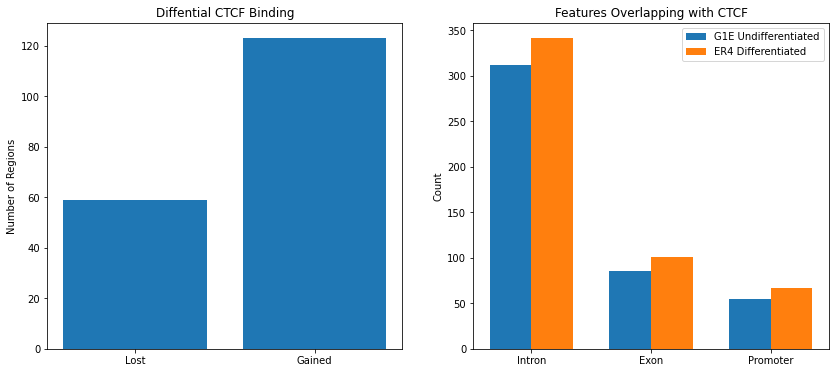

In [87]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,6))
ax1_labels = ["Lost", "Gained"]
ax1_values = [numLostRegions, numGainedRegions]
width = 0.35

x = np.arange(len(ER4_regions))

CTCF_dif = ax1.bar(ax1_labels, ax1_values)

undifferentiated = ax2.bar(x-width/2, G1E_fcounts, width, label = "G1E Undifferentiated")
differentiated = ax2.bar(x+width/2, ER4_fcounts, width, label = "ER4 Differentiated")



ax1.set_title("Diffential CTCF Binding")
ax1.set_ylabel("Number of Regions")
ax2.set_title("Features Overlapping with CTCF")
ax2.set_ylabel("Count")
ax2.legend()
ax2.set_xticks(x)
ax2.set_xticklabels(("Intron", "Exon", "Promoter"))

plt.show()